# Laboratorio 2

---

##### Nancy Mazariegos 22513
##### Santiago Pereira 22318
##### Giovanni Santos 22523

---

## Ejercicio #1 - Retardos de primer orden y sistemas lineales
---
#### Parte práctica

Simular un sistema de retardo de primer orden y visualizar el equilibrio.
Instrucciones:
1. Cree una variable de stock a partir de 0.
2. Establezca una entrada constante (p. ej., 10 unidades/día).
3. Implemente la salida como stock/retraso (retraso = 5 días).
4. Simule durante 50 días y grafique el stock y la salida a lo largo del tiempo.
5. Opcional: Añada un cambio repentino en la entrada (p. ej., a 20 unidades/día el día 25) y observe el ajuste.


Consideraciones
- Utilice un paso de tiempo (Δt) de 1 día para la integración de Euler.
- Etiquete los ejes y resalte los puntos de equilibrio.

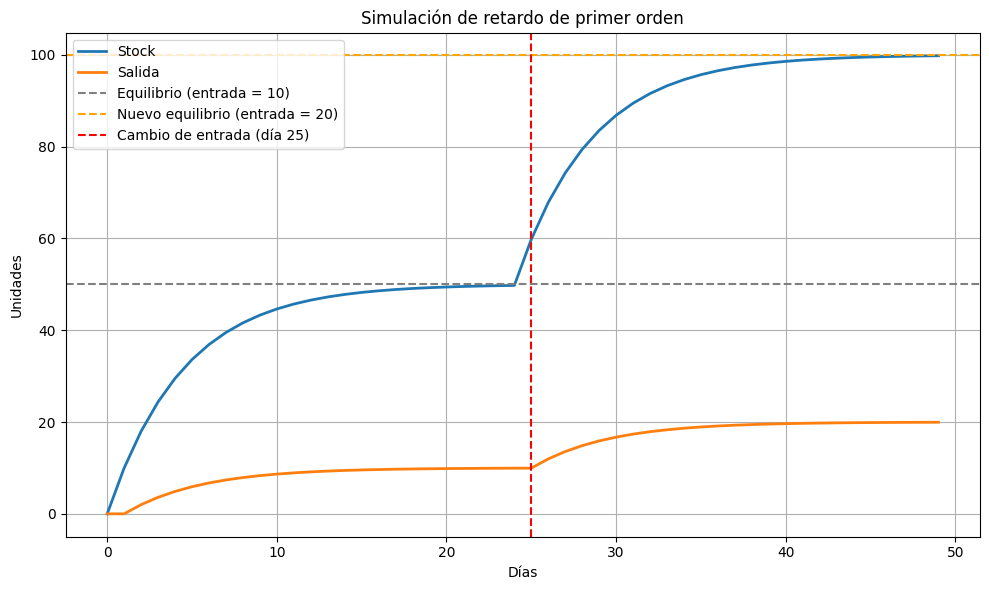

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dias = 50
dt = 1
retraso = 5
entrada = np.zeros(dias)
entrada[:25] = 10
entrada[25:] = 20

stock = np.zeros(dias)
salida = np.zeros(dias)

for t in range(1, dias):
    salida[t] = stock[t - 1] / retraso
    dStock = entrada[t] - salida[t]
    stock[t] = stock[t - 1] + dStock * dt

plt.figure(figsize=(10, 6))
plt.plot(range(dias), stock, label='Stock', linewidth=2)
plt.plot(range(dias), salida, label='Salida', linewidth=2)
plt.axhline(y=50, color='gray', linestyle='--', label='Equilibrio (entrada = 10)')
plt.axhline(y=100, color='orange', linestyle='--', label='Nuevo equilibrio (entrada = 20)')
plt.axvline(x=25, color='red', linestyle='--', label='Cambio de entrada (día 25)')
plt.xlabel('Días')
plt.ylabel('Unidades')
plt.title('Simulación de retardo de primer orden')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



El sistema responde de forma suave y gradual al cambio en la entrada, alcanzando nuevos equilibrios según el valor del retardo y la entrada. Esto ilustra el comportamiento típico de un retardo de primer orden.

---

## Ejercicio #2 - Retroalimentación Retrasada y Oscilaciones
---
#### Parte práctica

Modele un sistema con retrasos de percepción y visualice las oscilaciones.
Instrucciones
1. Crear:
a. Un stock "real" que se ajusta a un objetivo (p. ej., 50 unidades).
b. Un stock "percibido" con retraso (p. ej., un retraso de Erlang de 15 días).
2. Utilizar el stock percibido para la retroalimentación (flujo = (objetivo - percibido)/retraso).
3. Simular durante 200 días y representar gráficamente los stocks reales y percibidos.
4. Opcional: Añadir ruido a la percepción y observar la estabilidad.

Considere

- Utilizar numpy.convolve para la implementación del retraso de Erlang.
- Resaltar las fases de sobrecorrección en los gráficos.

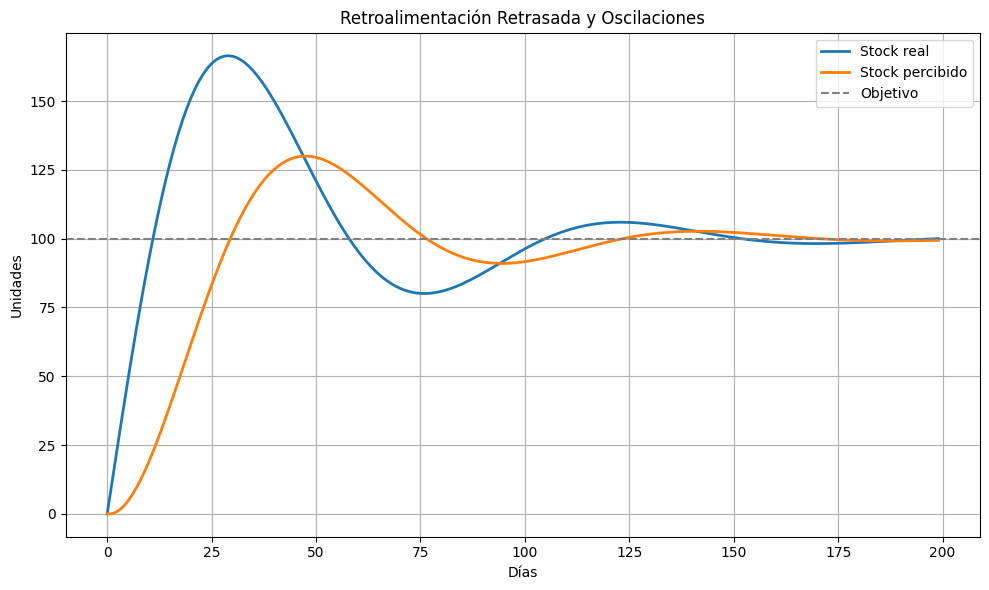

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dias = 200
dt = 1
objetivo = 100
retraso_percepcion = 20
retraso_ajuste = 10

real = np.zeros(dias)
percibido = np.zeros(dias)
flujo = np.zeros(dias)

for t in range(1, dias):
    percibido[t] = percibido[t-1] + (real[t-1] - percibido[t-1]) * dt / retraso_percepcion
    flujo[t] = (objetivo - percibido[t]) / retraso_ajuste
    real[t] = real[t-1] + flujo[t] * dt

plt.figure(figsize=(10,6))
plt.plot(range(dias), real, label='Stock real', linewidth=2)
plt.plot(range(dias), percibido, label='Stock percibido', linewidth=2)
plt.axhline(y=objetivo, color='gray', linestyle='--', label='Objetivo')
plt.xlabel('Días')
plt.ylabel('Unidades')
plt.title('Retroalimentación Retrasada y Oscilaciones')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


El sistema se pasa del objetivo al principio porque reacciona tarde. Esto causa subidas y bajadas antes de estabilizarse. La gráfica muestra cómo un retraso en la percepción puede hacer que el ajuste no sea inmediato ni suave.

---

## Ejercicio #3 - Sistemas no lineales y modelado SIR
---
#### Parte práctica

Simule un modelo SIR y explorar la dinámica no lineal.
Instrucciones:
1. Inicializar las poblaciones: S = 990, I = 10, R = 0.
2. Establecer parámetros: β = 0,3/día, μ = 0,1/día (R₀ = 3).
3. Implementar las ecuaciones:
- dS/dt = -βSI/N

- dI/dt = βSI/N – μI

- dR/dt = μI

4. Ejecutar durante 100 días y graficar S, I, R.
5. Opcional: Añadir la vacunación el día 30 (p. ej., vacunar al 50 % de S) y observar el impacto.

Considere

- Utilizar solve_ivp de SciPy para la integración.
- Anotar el punto máximo de infección y el umbral de inmunidad de grupo